In [1]:
# De ley
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pyplot as plt 
from numpy.random import seed
from numpy.random import randn
from IPython.display import Image

# modelar
#import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
#import faraway.utils
import numpy.random

#from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
from scipy import stats
#from sklearn.metrics import mean_squared_error


<ipython-input-1-6da561e11481>:20: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Comenzaremos por estudiar dos variables conjuntamente:

* YearsExperiece: Años de experiencia en un trabajo.
* Salary: El salario ganado por los años de experiencia.

La idea es ver si podemos predecir de la mejor manera el salario obtenido de acuerdo a los años de experiencia ganados.

* $Y_i$ : Salary
* $X_i$ : YearsExperience 



In [2]:
df = pd.DataFrame({
    'headcirc': [27,29,30,28,29,23,22,26,27,25,23,26,27,27],
    'gestage' : [29,31,33,31,30,25,27,29,28,29,26,30,29,29]
})

In [3]:
df = pd.read_csv('C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/Datasets/Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


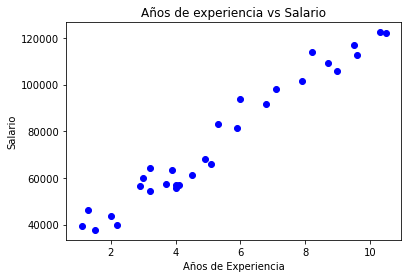

In [5]:
plt.scatter(df['YearsExperience'], df['Salary'], color = 'blue')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.title('Años de experiencia vs Salario')
plt.show()

Esto nos sugiere que el perimetro cefalico aumenta al aumentar la edad gestacional, dicho aumento pareciera seguir un patron lineal. 

Lo ideal es verificar los supuestos de normalidad conjunta.

# Modelo de regresion Lineal Simple

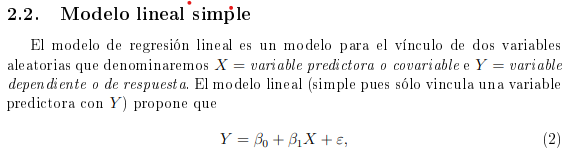

In [6]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_1.png')

Se propone el modelo de regresión lineal simple que 'modele' a los datos propuestos, tal que:
1. Por cada valor de X, le corresponde una observación Y. 
2. $Y = \beta_{0} + \beta_{1}X + \epsilon$
3. $\epsilon$ = Variable que nos da cuenta sobre la relación entre X e Y, variable que esta expuesta a variaciones individuales que hacen que el par $X,Y$ no caiga exactamente sobre la recta, sino cerca de ella. 
4. $\beta_{0}$, $\beta_{1}$ son constantes desconocidas que se denominan parámetros del modelo o coeficientes de la ecuación. 
5. $\beta_{0}$ = Ordenada al origen. 
6. $\beta_{1}$ = Pendiente

Otra forma de escribir el modelo es pensando en las observaciones $X_i$, $Y_i$ donde $\epsilon_{i}$ es el termino error para el individuo i-esimo que no es observable:
* $Y_i = \beta_{0} + \beta_{1}X_{i}+\epsilon_{i}$

# Supuestos del Modelo Lineal

Se puede observar que la mayoria de los puntos no caen exactamente sobre una linea, la dispersión de los puntos alrededor de cualquier linea que se dibuje representa la variación del perimetro cefalico que no esta asociada a la edad gestacional, que usualmente se considera que es de naturaleza aleatoria, muchas veces esta aleatoridad se debe a la falta de información adicional y de un modelo complejo que pueda dar un adecuado vínculo funcional entre estos datos y la variable respuesta. 

Se espera que todos estos componentes diversos se sumen entre sí y tengan un aporte muy menor a la explicación de la variable respuesta comparada con el de la explicativa considerada. Todas estas caracteristicas independientes asociadas al individuo y que no podemos saber las incluyamos en el término del error, asumiendo que al ser sumadas se distribuyan normalmente. 

Si para algun conjunto de datos estos supuestos no se cumplen no se puede aplicar el modelo de regresión lineal simple a dichos datos.

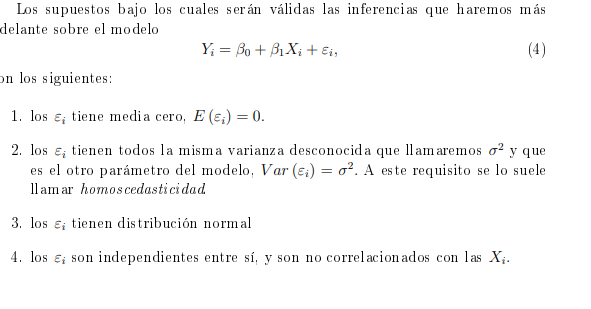

In [7]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_2.png')

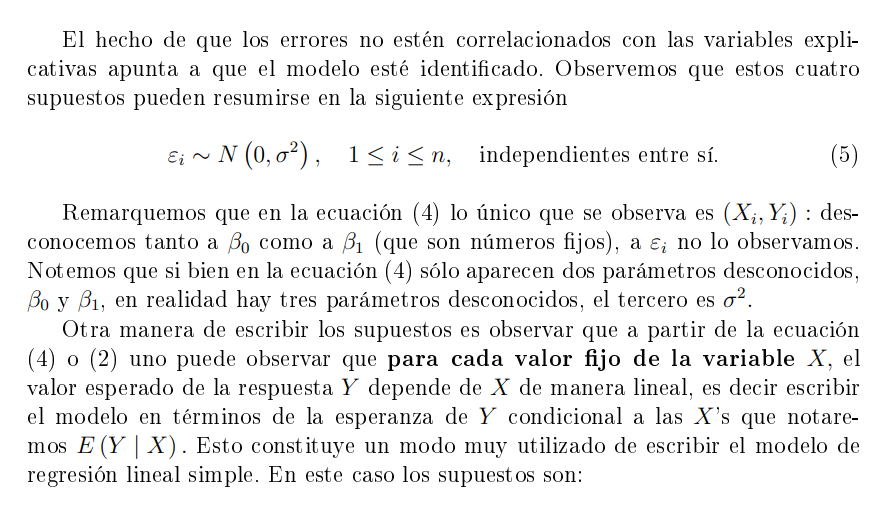

In [8]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_3.png')

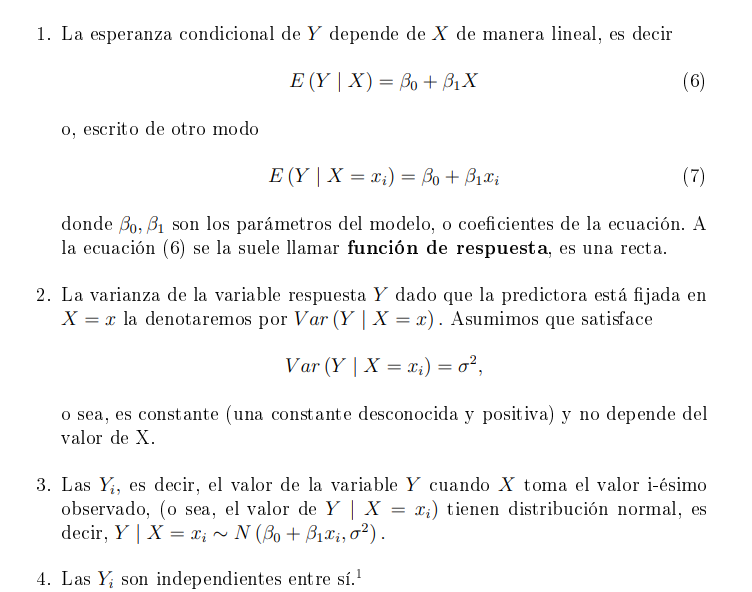

In [9]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_4.png')

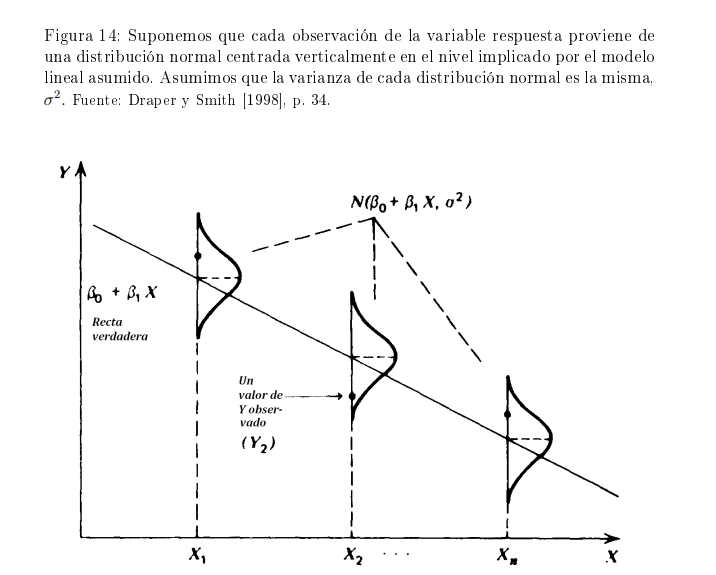

In [10]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_5.png')

# Estimacion de B0 y B1

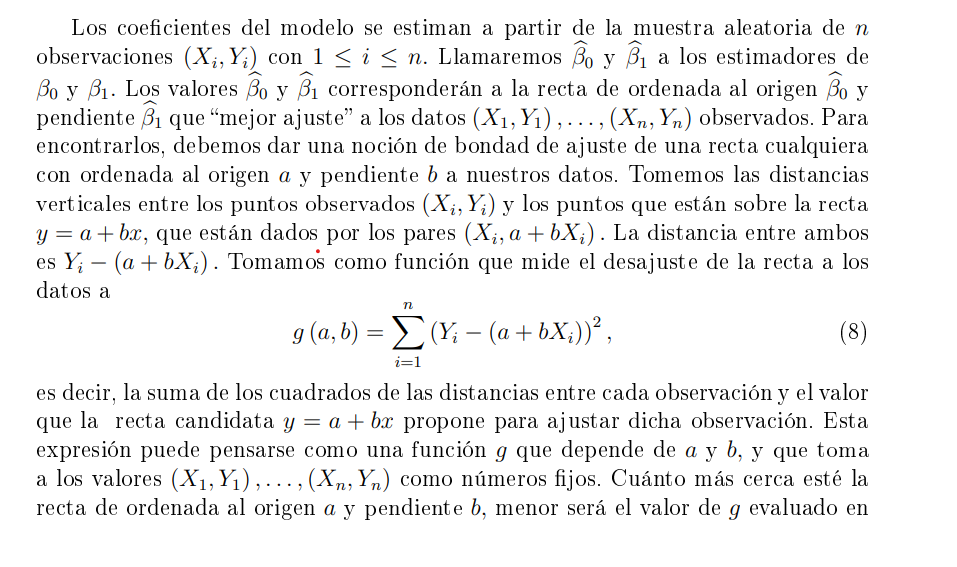

In [11]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_6.png')

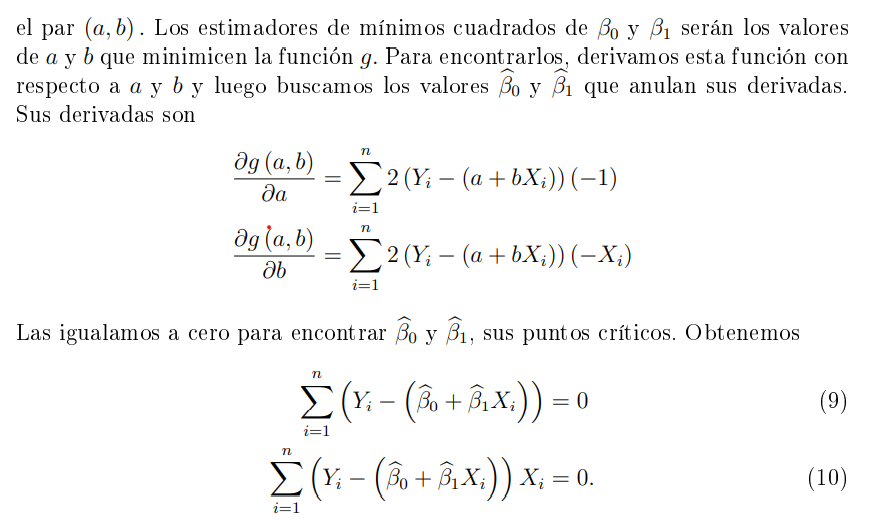

In [12]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_7.png')

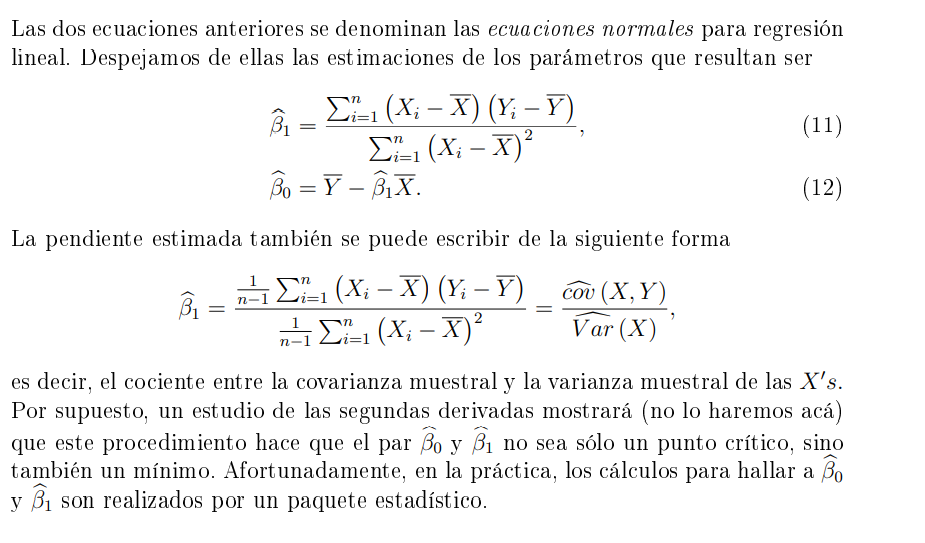

In [13]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_8.png')

In [14]:
x_mean = np.mean(df["YearsExperience"])
y_mean = np.mean(df["Salary"])
x_mean , y_mean

(5.3133333333333335, 76003.0)

##  Coeficientes optimos de regresión por metodo de minimos cuadrados

### Beta 1 estimado

In [15]:
df["beta_numerador"] = (df["YearsExperience"] - x_mean) * (df["Salary"] - y_mean)
df["beta_denominador"] = (df["YearsExperience"] - x_mean)**2
beta_1 = sum(df["beta_numerador"])/sum(df["beta_denominador"])

### Beta 0 estimado

In [16]:
beta_0 = y_mean - beta_1 * x_mean

In [17]:
(beta_1, beta_0)

(9449.962321455077, 25792.20019866869)

# Recta ajustada, valores predichos y residuos

Una vez ya teniendo los estimadores de beta_0 y beta_1, se propone la recta ajustada:

$$ \widehat{Y} = 25792.20019866869 + 9449.962321455077 * X$$

de tal manera que dicha recta ajustada se aproxima a la recta de regresión lineal propuesta para representar al conjunto de datos que es: 



$$Y = \beta_{0} + \beta_{1}X + \epsilon$$

osea $$\widehat{Y} \rightarrow Y$$

In [18]:
X = df['YearsExperience']
Y = df['Salary']
recta_ajustada = beta_0 + beta_1 * X

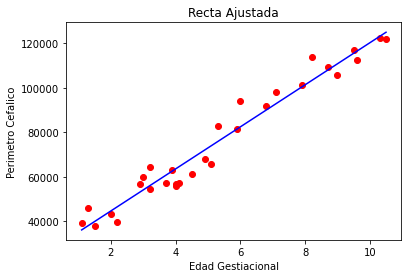

In [19]:
#graficamente 
plt.scatter(X, Y, color = "red")
plt.plot(X,recta_ajustada,color = "blue")
plt.xlabel('Edad Gestiacional')
plt.ylabel('Perimetro Cefalico')
plt.title('Recta Ajustada')
plt.show()

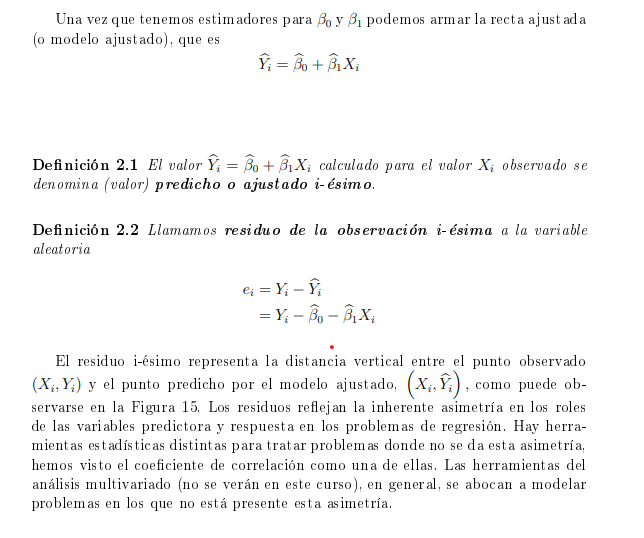

In [20]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_9.png')

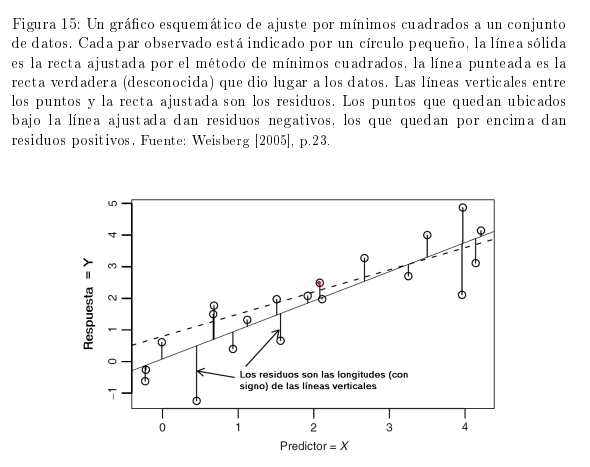

In [21]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_10.png')

In [22]:
df['valor_predicho'] = beta_0 + beta_1 * X

In [23]:
df['residuo'] = Y - df['valor_predicho']

## Significado de los coeficientes estimados

$$ \widehat{Y} = -3.1607142857142776 + 1.0178571428571426 * X$$

El valor de la ordenada al origen, es decir -3.91 es el valor del perimetro cefalico esperado para una edad gestacional de 0 semanas, lo que en muchos casos no tiene sentido. La pendiente de la recta es 1.01, lo que implica que para cada incremento de una semana en la edad gestacional, el perimetro cefalico del bebe aumenta en 1.01 centrimetros en promedio.

In [24]:
df = df[['YearsExperience','Salary','valor_predicho','residuo']]

In [25]:
df.head()

,YearsExperience,Salary,valor_predicho,residuo
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


## ¿Que error tiene esta predicción?

Para contestar esta pregunta tenemos que estimar la varianza condicional de Y

# Estimacion de sigma^2

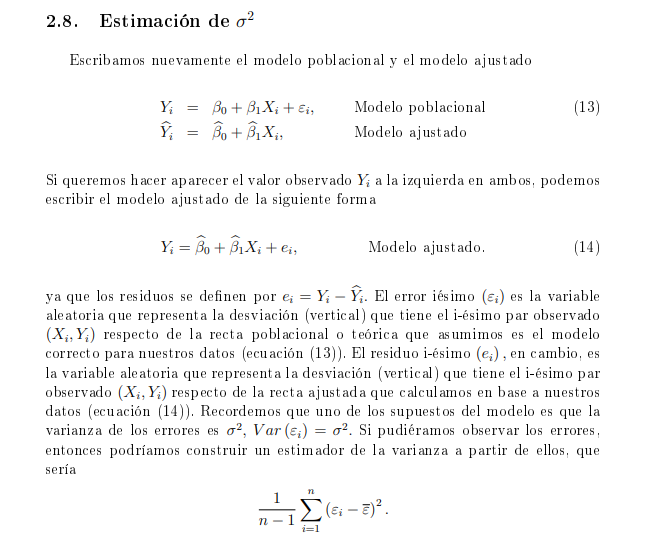

In [26]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_11.png')

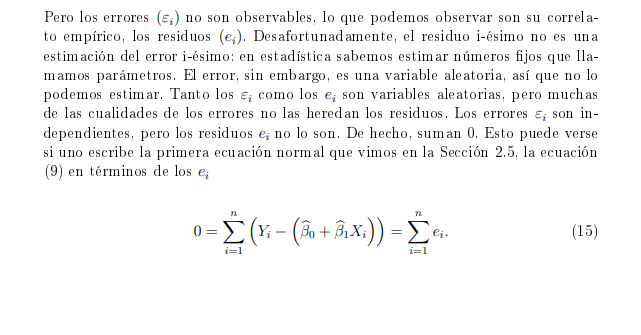

In [27]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_12.png')

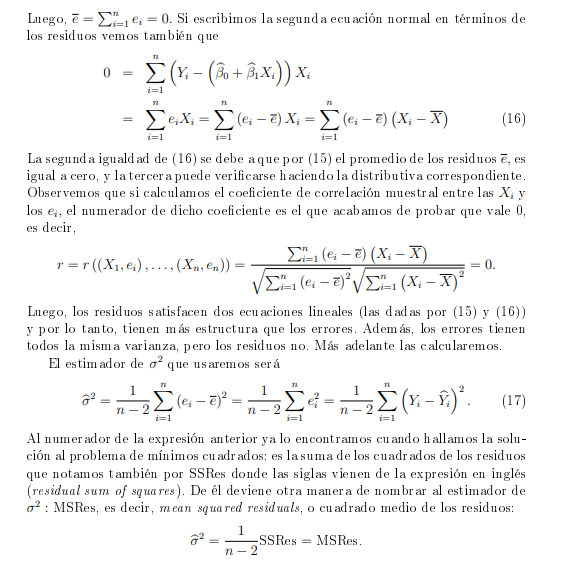

In [28]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_13.png')

In [29]:
#estimador de la varianza 
n = len(df)
mean_squared_residuals = sum(df['residuo'] ** 2) * (1/(n-2))

In [30]:
mean_squared_residuals

33504591.131015323

In [31]:
#La varianza de los datos es:
df['Salary'].var()

751550960.4137931

In [32]:
# se puede observar que msr < que la varianza de los datos

# Inferencia sobre $\beta_1$

 Para el estimador  $\widehat{\beta_1}$, si los datos siguen el modelo poblacional $Y = \beta_{0} + \beta_{1}X + \epsilon$, junto con los supuestos (homocedasticidad, independencia y normalidad en los errores)  
 
 $\rightarrow$ 
 
 podemos estimar la varianza y la esperanza de  $\widehat{\beta_1}$

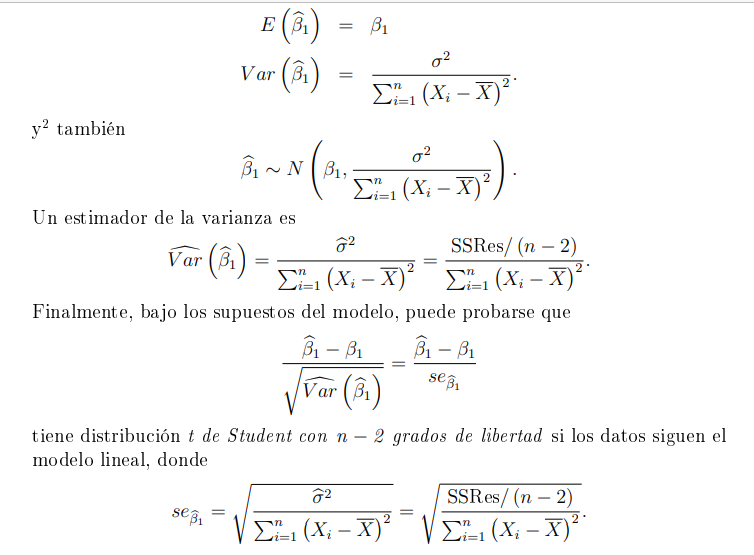

In [33]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_14.png')

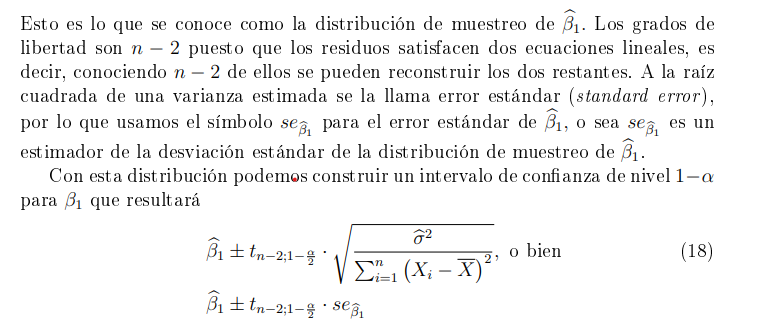

In [34]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_15.png')

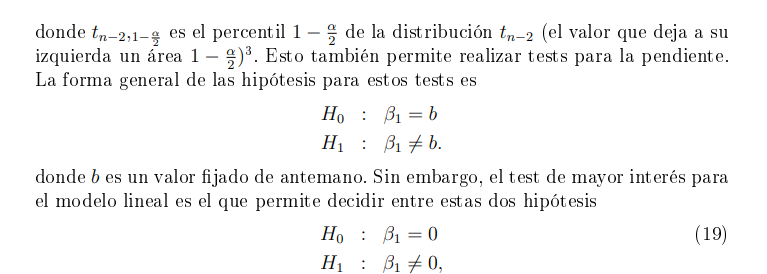

In [35]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_16.png')

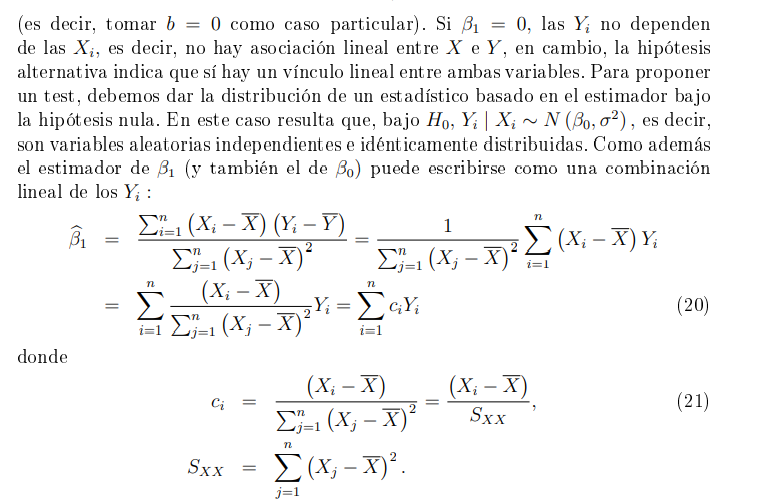

In [36]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_17.png')

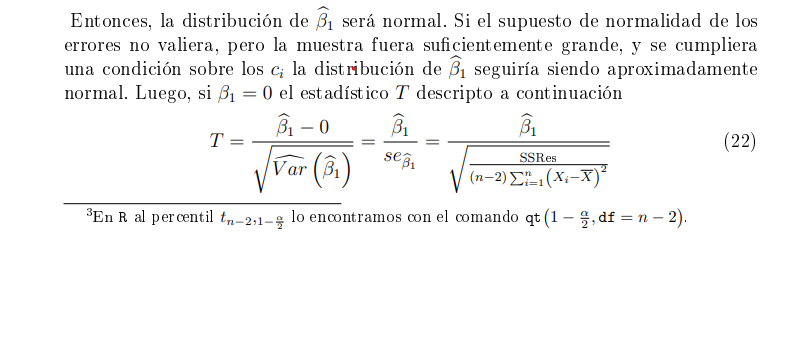

In [37]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_18.png')

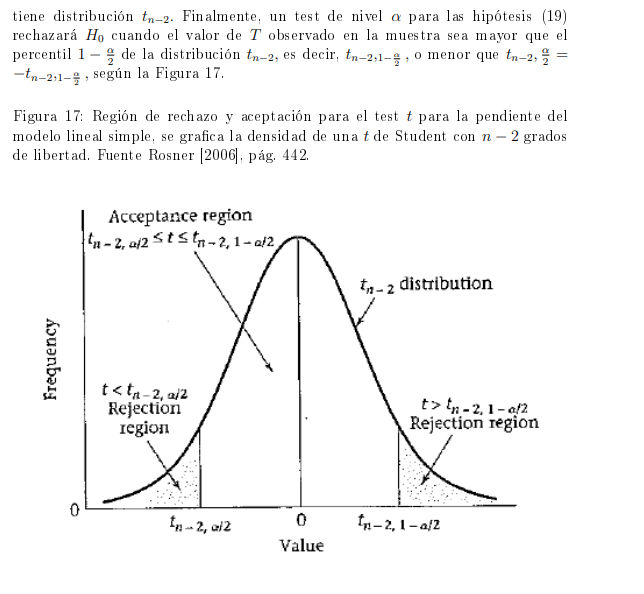

In [38]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_19.png')

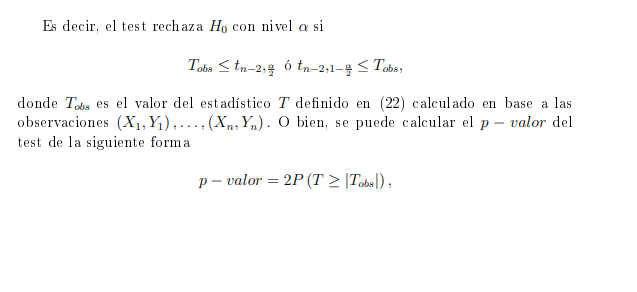

In [39]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_20.png')

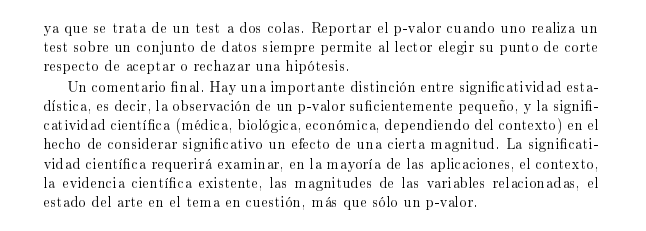

In [40]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_21.png')

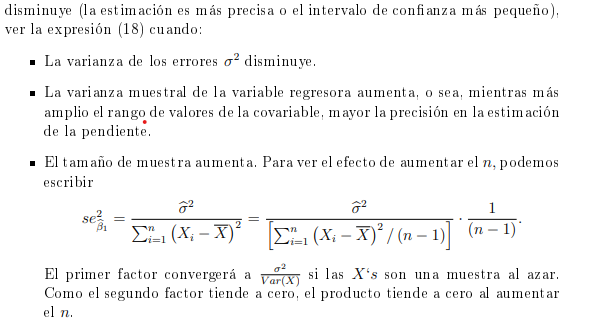

In [41]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_22.png')

In [42]:
def infe_b1(df,X,Y, alpha = 0.05):
    from scipy.stats import t
    
    n = len(df)
    
    #calcular b1 estimado
    Sxx = sum((df[X] - np.mean(df[X])) ** 2)
    ci = (df[X] - np.mean(df[X])) / Sxx
    beta1_est = sum(ci * df[Y])
    
    # raiz cuadrada del estimador de la varianza de beta 1 estimado
    se_b1 = np.sqrt( (sum(df['residuo'] ** 2) * (1/(n-2))) / (sum((df[X] - np.mean(df[X])) ** 2)) )
    
    # t_(n-2),(1-alpha/2) =  percentil 1 - alpha/2  de la distribucion t_(n-2)
    t_student = t.ppf(1 - (alpha/2), n-2)
    
    intervalo_confianza =  (t_student * se_b1) - beta1_est , beta1_est + (t_student * se_b1)
    
    print('Intervalo de confianza para B1: {} '.format(intervalo_confianza))
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print('Prueba a nivel del 0.05 para la hipotesis:   H0 : B1=0 vs H1 : B1!=0 ')
    
    T_obs = beta1_est / se_b1
    
    if T_obs > t_student:
        print('Rechazamos H0, aceptando H1, concluyendo que el parametro poblacional que mide la pendiente del modelo lineal es distinto de cero')
    else:
        print('Aceptamos H0, concluyendo que el parametro poblacional que midel la pendiente es 0')
    


In [43]:
infe_b1(df,'YearsExperience','Salary')

Intervalo de confianza para B1: (-8674.11874659666, 10225.805896313495) 
----------------------------------------------------------------
----------------------------------------------------------------
Prueba a nivel del 0.05 para la hipotesis:   H0 : B1=0 vs H1 : B1!=0 
Rechazamos H0, aceptando H1, concluyendo que el parametro poblacional que mide la pendiente del modelo lineal es distinto de cero


El intervalo esta en los Reales, el verdadedor valor de la pendiente B1 puede ser positivo o negativo, la muestra es muy pequeña, por ende el intervalo no es muy preciso del todo. 

# Inferencia sobre B0

De igual manera que con B1, bajo los supuestos del modelo lineal: 

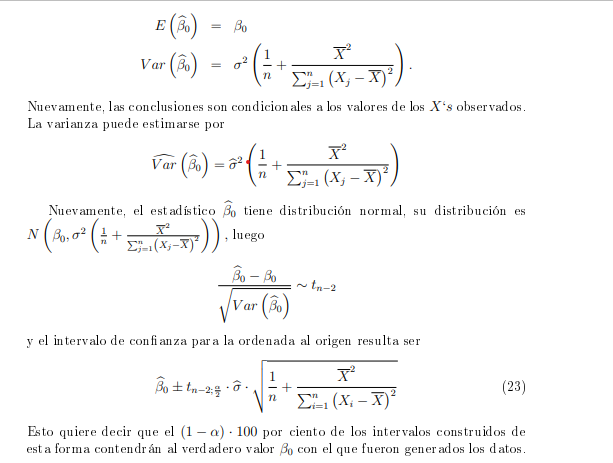

In [44]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_23.png')